In [2]:
#Import libraries
from sklearn.cluster import KMeans
import pandas as pd
import pylab as plt
import numpy as np
from collections import defaultdict, Counter

In [3]:
# Import data, replace '?' with mean values, and filter to attribute columns only
bcancer = pd.read_csv('Breast-Cancer-Wisconsin.csv')
bcancer = bcancer.replace('?',np.nan)
bcancer["A7"] = pd.to_numeric(bcancer["A7"])
bcancer.fillna(bcancer.mean(), inplace = True)
bcw = bcancer.filter(["A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"], axis =1)
list(bcw)

['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']

In [4]:
#Kmeans cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(bcw)
labls = kmeans.fit_predict(bcw)
print(labls)
print(kmeans.inertia_)

[0 3 0 1 0 2 0 0 0 0 0 0 0 0 2 1 0 0 3 0 3 1 0 1 0 3 0 0 0 0 0 0 1 0 0 0 1
 0 3 3 1 1 2 1 1 0 3 0 0 1 1 0 1 2 3 1 1 1 3 1 1 0 1 1 0 1 0 3 2 0 0 1 0 3
 1 0 0 0 0 0 0 0 0 0 2 1 3 2 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 2 0 3 2 0 3 0
 3 3 2 0 0 0 2 0 0 0 0 2 3 2 0 3 0 3 0 0 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0
 0 2 0 3 1 0 0 3 0 0 0 2 3 0 0 0 0 0 2 1 0 0 0 0 0 2 3 2 0 1 0 3 0 0 0 2 3
 0 2 2 2 0 2 2 0 0 0 0 3 0 0 0 2 3 0 0 0 2 1 0 0 0 2 2 0 2 2 1 0 0 1 0 0 2
 0 3 3 0 3 1 0 2 3 2 1 3 0 0 2 1 2 3 0 0 0 0 0 0 2 3 0 0 0 3 3 2 1 3 0 0 0
 3 3 2 2 3 1 0 3 3 1 0 3 0 3 0 0 0 0 0 0 3 0 0 3 3 3 2 2 0 1 2 0 0 1 3 0 3
 1 0 0 3 1 0 2 0 3 3 0 0 1 0 0 0 1 0 0 1 3 2 0 3 3 0 0 3 0 0 3 0 1 3 3 0 0
 3 3 0 3 0 0 3 3 0 0 0 2 0 0 0 1 3 0 0 1 2 0 0 0 2 1 3 2 3 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 3 0 3 0 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0 0 3 3 1 0 0 0 3 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 3 1 0 0 0 0 0 0 0 1 3 3 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 2 0 0 0 2 1 0 0 3 0 

In [5]:
f1 = bcw['A2'] # if you load from dataframe use data['columnname1'].values
f2 = bcw['A3'] 
f3 = bcw['A4'] 
f4 = bcw['A5'] 
f5 = bcw['A6'] 
f6 = bcw['A7'] 
f7 = bcw['A8'] 
f8 = bcw['A9'] 
f9 = bcw['A10'] 


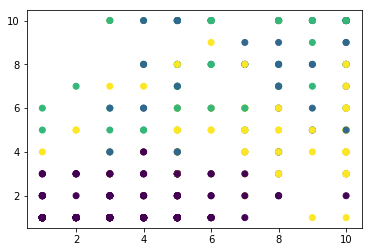

In [6]:
#print("Colors represent KMeans clusters")
plt.scatter(f1,f2, c=labls)
plt.show()

In [8]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


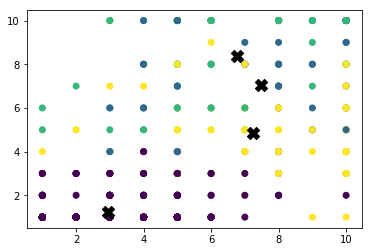

In [9]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(f1,f2,c=labls)
plt.scatter(centroids_x,centroids_y, marker = 'X', s=150, c='black')

In [10]:
# make a range
ks = range(1, 15)
bcw = bcancer.filter(["A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"], axis =1)

inertias = [] # empty list

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(bcw)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

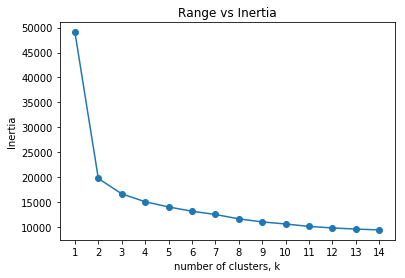

In [111]:
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()
### In your final project - explain how to determine the  best number of clusters

(2.8157406585949314, 3.051459109954201, 2.9719127672157133, 2.8553792392170236, 2.214299886649048, 3.6018516398045306, 2.438364252324251, 3.053633893612775, 1.7150779425067944)

Standard deviation varies between a max of 3.6 and a min of 1.72


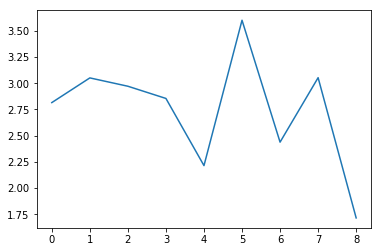

In [19]:
from statistics import stdev
sd_df = (stdev(f1),stdev(f2), stdev(f3), stdev(f4), stdev(f5), stdev(f6), stdev(f7), stdev(f8), stdev(f9))
print(sd_df)
print()
print("Standard deviation varies between a max of", round(max(sd_df),2), "and a min of", round(min(sd_df),2))
plt.plot(sd_df)

In [12]:
#Perform normalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
model2 = KMeans(n_clusters=2) # best optimal number using inertia.
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model2)
pipeline.fit(bcw)
labels2 = pipeline.predict(bcw)
print(labels2)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

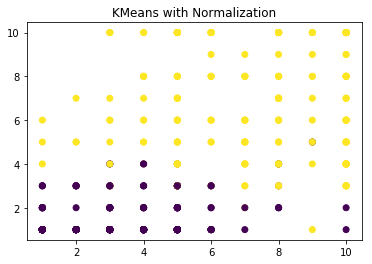

In [15]:
# make a scatter plot with labels
plt.scatter(f1,f2,c=labels2)
plt.title('KMeans with Normalization')
plt.show()
# compare your first scatter plot without normalization

[[-0.497738   -0.60811342 -0.60323903 -0.51617307 -0.51352357 -0.58571702
  -0.54849564 -0.53060302 -0.30367169]
 [ 0.98276779  1.20070054  1.19107621  1.01916726  1.01393589  1.15647956
   1.08298713  1.04765873  0.59959005]]


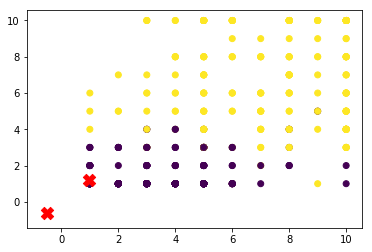

In [17]:
centroids2 = model2.cluster_centers_
print(centroids2)
# Assign the columns of centroids: centroids_x, centroids_y
centroids2_x = centroids2[:,0]
centroids2_y = centroids2[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(f1,f2,c=labels2)
plt.scatter(centroids2_x,centroids2_y, marker = 'X', s=150, c='red')